<a href="https://colab.research.google.com/github/rajsaumyaa/ML_labs/blob/main/exp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Description:
       Custom

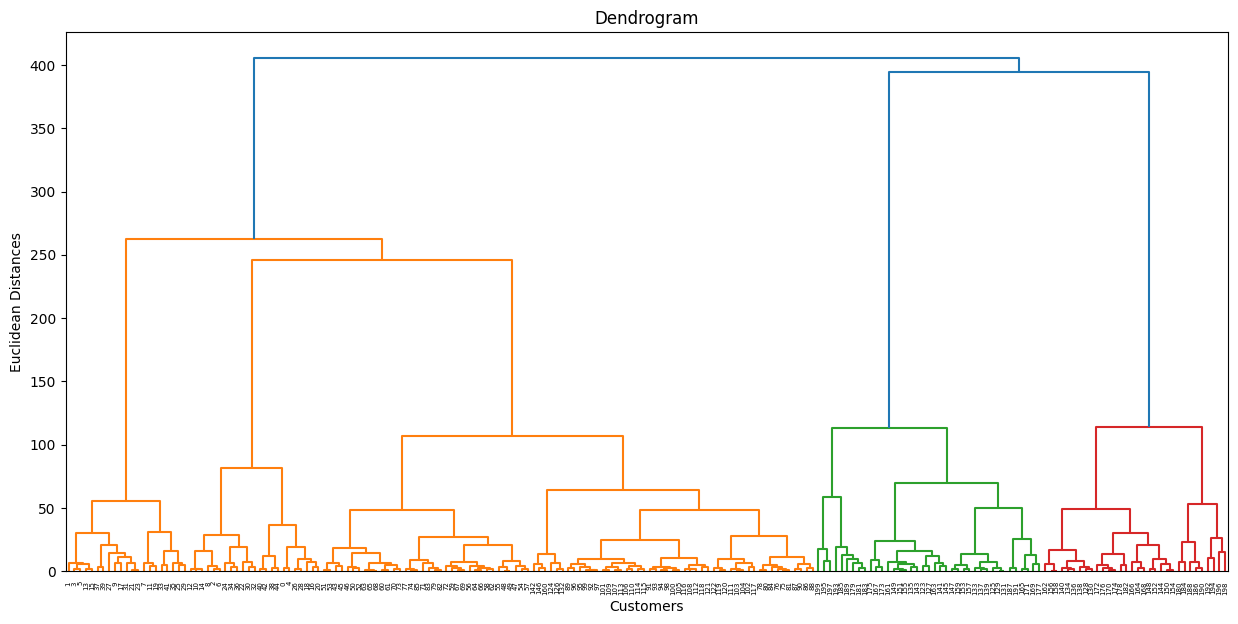

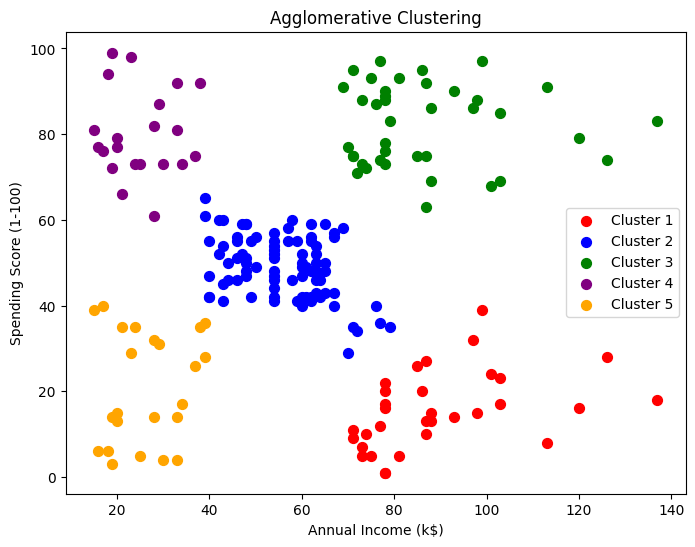

In [1]:
# ==============================
# Import required libraries
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# ==============================
# Load Dataset
# ==============================
# If using local file
# dataset = pd.read_csv("Mall_Customers.csv")

# OR use GitHub dataset (recommended)
url = "https://raw.githubusercontent.com/tanishq21/Mall-Customers/main/Mall_Customers.csv"
dataset = pd.read_csv(url)

# ==============================
# Basic Data Exploration
# ==============================
print(dataset.head())
print("\nShape:", dataset.shape)
print("\nInfo:")
print(dataset.info())
print("\nDescription:")
print(dataset.describe())

# ==============================
# Select Features for Clustering
# ==============================
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

# ==============================
# Hierarchical Clustering - Dendrogram
# ==============================
plt.figure(figsize=(15, 7))
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

# ==============================
# Apply Agglomerative Clustering
# ==============================
hc = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)

y_hc = hc.fit_predict(X)

# ==============================
# Visualize Clusters
# ==============================
plt.figure(figsize=(8, 6))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1],
            s=50, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1],
            s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1],
            s=50, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1],
            s=50, c='purple', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1],
            s=50, c='orange', label='Cluster 5')

plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
